## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [3]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [4]:
# Answer below
from sklearn.model_selection import train_test_split as tts

x = titanic.drop(columns=["Survived"])
y = titanic.Survived

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [53]:
# Answer below
def build_model(optimizer='adam', loss='binary_crossentropy', metrics=['mse']):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

basemodel = build_model()

Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [54]:
# Answer below:
sgd = SGD(learning_rate=0.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [55]:
# Answer below:
sgdmodel = build_model(optimizer=sgd, loss="mse")
sgdmodel.fit(X_train, y_train, batch_size=100, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2531 - mse: 0.2531 - val_loss: 0.2480 - val_mse: 0.2480
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.2425 - val_mse: 0.2425
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2436 - mse: 0.2436 - val_loss: 0.2391 - val_mse: 0.2391
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2405 - mse: 0.2405 - val_loss: 0.2354 - val_mse: 0.2354
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2383 - mse: 0.2383 - val_loss: 0.2319 - val_mse: 0.2319
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2347 - mse: 0.2347 - val_loss: 0.2299 - val_mse: 0.2299
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2345 - mse: 0.2345 - val_loss: 0.2274 - val_mse: 0.2274
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2319 - mse: 0.2319 - val_loss: 

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [56]:
# Answer below:
sgdmodel.fit(X_train, y_train, batch_size=100, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
8/8 [==============================] - 0s 13ms/step - loss: 0.1427 - mse: 0.1427 - val_loss: 0.1399 - val_mse: 0.1399
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1422 - mse: 0.1422 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1423 - mse: 0.1423 - val_loss: 0.1366 - val_mse: 0.1366
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1418 - mse: 0.1418 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1408 - mse: 0.1408 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1407 - mse: 0.1407 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 0.1403 - mse: 0.1403 - va

There is no palpable difference between the two models above.

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [57]:
# Answer below:
sgdmodel.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
4/4 [==============================] - 0s 30ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1239 - mse: 0.1239 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1235 - mse: 0.1235 - val_loss: 0.1293 - val_mse: 0.1293
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1320 - val_mse: 0.1320
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1292 - val_mse: 0.1292
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1237 - mse: 0.12

The difference in performance is not significant.

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [58]:
# Answer below
# Answer below
def build_model_7(optimizer='adam', loss='binary_crossentropy', metrics=['mse']):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [59]:
# Answer below:
sgdmodel = build_model_7(optimizer=sgd)
sgdmodel.fit(X_train, y_train, batch_size=80, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 0.6856 - mse: 0.2463 - val_loss: 0.6673 - val_mse: 0.2371
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6705 - mse: 0.2387 - val_loss: 0.6556 - val_mse: 0.2314
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6629 - mse: 0.2350 - val_loss: 0.6472 - val_mse: 0.2273
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6538 - mse: 0.2306 - val_loss: 0.6410 - val_mse: 0.2243
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6538 - mse: 0.2307 - val_loss: 0.6337 - val_mse: 0.2209
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6516 - mse: 0.2297 - val_loss: 0.6268 - val_mse: 0.2176
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6345 - mse: 0.2215 - val_loss: 0.6185 - val_mse: 0.2137
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6117 - mse: 0.2105 - va

Define a new SGD optimizer with a learning rate of 0.001

In [60]:
# Answer below:
sgd = SGD(learning_rate=0.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [61]:
# Answer below:
sgdmodel = build_model_7(optimizer=sgd)
sgdmodel.fit(X_train, y_train, batch_size=80, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 24ms/step - loss: 0.7114 - mse: 0.2591 - val_loss: 0.7111 - val_mse: 0.2590
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7060 - mse: 0.2564 - val_loss: 0.7099 - val_mse: 0.2584
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7073 - mse: 0.2571 - val_loss: 0.7088 - val_mse: 0.2578
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7064 - mse: 0.2566 - val_loss: 0.7078 - val_mse: 0.2573
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7045 - mse: 0.2557 - val_loss: 0.7069 - val_mse: 0.2569
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7011 - mse: 0.2540 - val_loss: 0.7061 - val_mse: 0.2564
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7031 - mse: 0.2550 - val_loss: 0.7052 - val_mse: 0.2560
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7016 - mse: 0.2542 - va

Having a learning rate of 0.05 is too large for this data set, thus the divergence.

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [71]:
# Answer below:
from sklearn.metrics import confusion_matrix
#y_pred = np.argmax(sgdmodel.predict(X_test), axis=-1)
preds = model.predict(X_test)
y_pred = np.where(preds > 0.5, 1, 0).flatten()

#rounded_predictions = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [72]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[100  16]
 [ 19  43]]


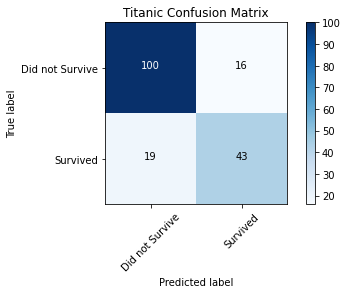

In [73]:
cm_plot_labels = ["Did not Survive", "Survived"] # for a better look at the CM
plot_confusion_matrix(cm, cm_plot_labels, title='Titanic Confusion Matrix')